Introduction
Gliederung des Notebooks:
xyz

Team:
Philipp Schroeder, Lena Elstner, Maria Daubner, Janis Eckermann

1. Importing Libraries

In [8]:
# Standard Imports
import pandas as pd
import numpy as np
import os
from datetime import datetime
import requests

# Model Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, fbeta_score

# Models
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Sampling for Imbalanced Data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation Tools
import shap
from lime.lime_tabular import LimeTabularExplainer

2. Loading and Preparing the Dataset

In [10]:
# csv-file from Git
#url = "https://github.com/JanisEcker/PraxisProjekt_SAP/blob/main/df.csv"
url = "https://raw.githubusercontent.com/JanisEcker/PraxisProjekt_SAP/main/df.csv"

# load csv
response = requests.get(url)
if response.status_code == 200:
    df = pd.read_csv(url)
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

In [11]:
df

,Betrag,ZeitLetzteTx,EntfernungClusterzentrum,EntfernungnaechstesGeraet,letzteHandyEntsperrung,Alter,Fraud,5311,5411,5541,5812,5912,7995,6012,5813,4111,7011
0,9820.47,8.08,14.60,72.68,2.65,41,0,1,0,0,0,0,0,0,0,0,0
1,5627.49,4.59,66.79,266.34,10.78,38,0,0,0,0,0,0,0,0,0,0,1
2,9562.64,0.49,8.23,82.54,9.12,41,0,0,0,0,0,0,0,0,1,0,0
3,5110.41,17.82,303.59,222.74,24.93,84,1,0,0,0,0,0,1,0,0,0,0
4,8687.87,0.96,959.45,299.30,35.94,78,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6739.59,14.07,908.08,129.68,41.97,86,0,0,0,0,1,0,0,0,0,0,0
49996,5924.87,9.51,15.34,326.58,6.93,44,0,1,0,0,0,0,0,0,0,0,0
49997,2839.01,6.95,72.17,132.99,20.73,40,0,0,0,0,0,1,0,0,0,0,0
49998,8365.39,17.50,59.68,294.49,7.78,31,0,0,0,0,0,1,0,0,0,0,0


In [12]:
df.describe()

,Betrag,ZeitLetzteTx,EntfernungClusterzentrum,EntfernungnaechstesGeraet,letzteHandyEntsperrung,Alter,Fraud,5311,5411,5541,5812,5912,7995,6012,5813,4111,7011
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,5019.949972,9.961703,150.949104,250.527718,29.944553,53.460020,0.229960,0.099820,0.099240,0.100260,0.100580,0.099320,0.102360,0.099540,0.098040,0.100820,0.10002
std,2886.431852,9.986872,233.902749,144.325561,29.851264,20.748744,0.420811,0.299763,0.298987,0.300349,0.300775,0.299094,0.303124,0.299389,0.297372,0.301093,0.30003
min,0.030000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2518.922500,2.850000,31.240000,125.015000,8.680000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5028.565000,6.900000,62.740000,250.830000,20.725000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7521.715000,13.820000,93.900000,375.690000,41.460000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9999.830000,104.480000,999.930000,499.990000,349.140000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Betrag                     50000 non-null  float64
 1   ZeitLetzteTx               50000 non-null  float64
 2   EntfernungClusterzentrum   50000 non-null  float64
 3   EntfernungnaechstesGeraet  50000 non-null  float64
 4   letzteHandyEntsperrung     50000 non-null  float64
 5   Alter                      50000 non-null  int64  
 6   Fraud                      50000 non-null  int64  
 7   5311                       50000 non-null  int64  
 8   5411                       50000 non-null  int64  
 9   5541                       50000 non-null  int64  
 10  5812                       50000 non-null  int64  
 11  5912                       50000 non-null  int64  
 12  7995                       50000 non-null  int64  
 13  6012                       50000 non-null  int

In [14]:
# Check for missing values
missing_values = df.isnull().sum()

#Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print(f"Columns with missing values: {missing_columns}")

Columns with missing values: Series([], dtype: int64)


2. Correlation Analysis

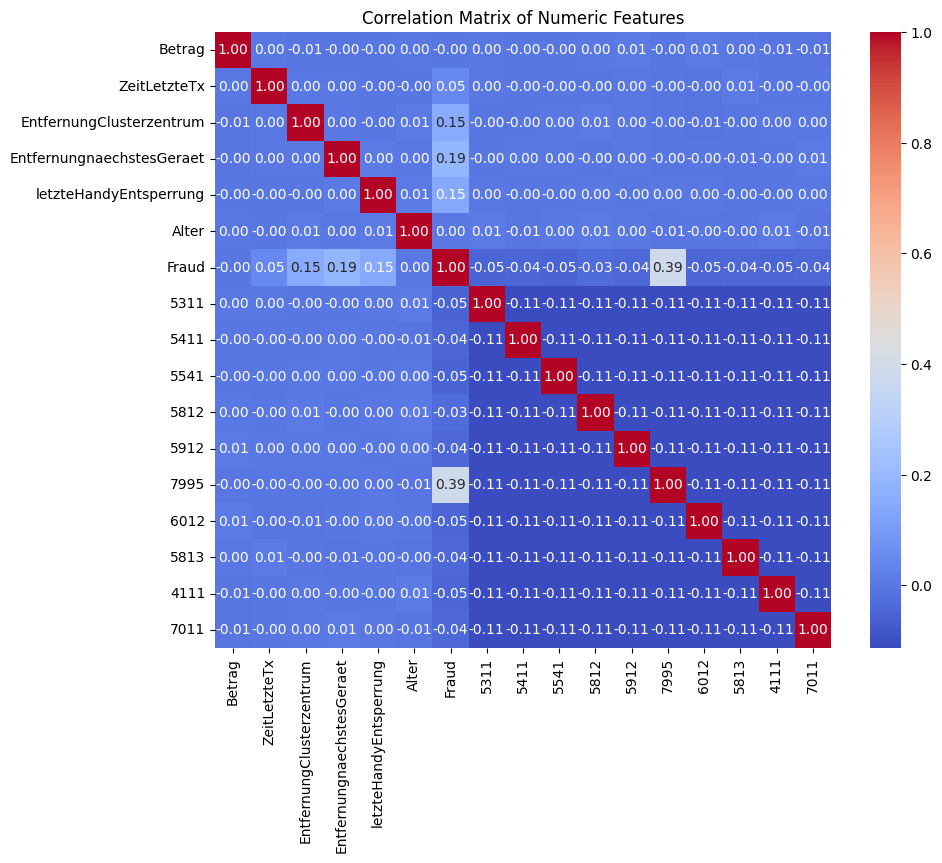

In [15]:
# Select only numeric features for the correlation matrix
numeric_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

Analysis of the Correlation Matrix:
xyz

3. First Overview: Test-Train-Split

In [16]:
X = df.drop('Fraud', axis=1)
y = df['Fraud']

In [17]:
# Train-test-Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

In [18]:
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

train_percentages = train_counts / len(y_train) * 100
test_percentages = test_counts / len(y_test) * 100

# Train set
print(f"Train Set:\n"
      f"Class 0: {train_counts[0]} samples ({train_percentages[0]:.2f}%)\n"
      f"Class 1: {train_counts[1]} samples ({train_percentages[1]:.2f}%)\n")

# Test set
print(f"Test Set:\n"
      f"Class 0: {test_counts[0]} samples ({test_percentages[0]:.2f}%)\n"
      f"Class 1: {test_counts[1]} samples ({test_percentages[1]:.2f}%)")

Train Set:
Class 0: 34652 samples (77.00%)
Class 1: 10348 samples (23.00%)

Test Set:
Class 0: 3850 samples (77.00%)
Class 1: 1150 samples (23.00%)


In [19]:
class_names = ['No_Fraud', 'Fraud']

In [20]:
# Create a file to track experiments
file_name = "experiment_results.csv"

# Define the columns for the CSV
columns = ["timestamp", "model", "params", "precision", "recall", "f2", "tn", "fp", "fn", "tp"]

# Check if the file already exists
if not os.path.exists(file_name):
    # Create a new DataFrame with the defined columns
    df = pd.DataFrame(columns=columns)
    # Save the DataFrame to a CSV file
    df.to_csv(file_name, index=False)
    print(f"{file_name} created with columns: {columns}")
else:
    print(f"{file_name} already exists and will not be overwritten.")

experiment_results.csv already exists and will not be overwritten.


In [21]:
# File to store the results
RESULTS_FILE = "experiment_results.csv"

In [22]:
def plot_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray, model_name: str):
    """
    Plot a confusion matrix for the model with class names (0: NoFraud, 1: Fraud).
    """
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=["No_Fraud (0)", "Fraud (1)"],
        yticklabels=["No_Fraud (0)", "Fraud (1)"]
    )
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


def plot_roc_curve(y_true: np.ndarray, y_prob: np.ndarray, model_name: str):
    """
    Plot the ROC curve for the model.
    """
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


def save_results(model_name: str, params: str, precision: float, recall: float, f2: float, tn: int, fp: int, fn: int,
                 tp: int):
    """
    Save the evaluation results to the CSV file. If the same model and parameters exist, overwrite the row.
    """
    # Prepare the new row data
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    new_row = {
        "timestamp": timestamp,
        "model": model_name,
        "params": params,
        "precision": precision,
        "recall": recall,
        "f2": f2,
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "tp": tp
    }

    # Check if the file exists
    if not os.path.exists(RESULTS_FILE):
        # If not, create a new DataFrame and save it
        pd.DataFrame([new_row]).to_csv(RESULTS_FILE, index=False)
        print(f"Results saved to {RESULTS_FILE}.")
    else:
        # Load existing results
        df = pd.read_csv(RESULTS_FILE)

        # Check if the same model and params exist
        exists = ((df["model"] == model_name) & (df["params"] == params)).any()

        if exists:
            # Overwrite the existing row
            df.loc[(df["model"] == model_name) & (df["params"] == params), :] = new_row
        else:
            # Append the new row
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

        # Save back to the CSV
        df.to_csv(RESULTS_FILE, index=False)
        print(f"Results updated in {RESULTS_FILE}.")


def evaluate_model(model, X_test: np.ndarray, y_test: np.ndarray, params: str, threshold: float = 0.5,
                   model_name: str = "Model"):
    """
    Main evaluation function to calculate metrics, generate predictions,
    and call plotting functions for model evaluation.
    """
    # Get probabilities and raw predictions
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)

    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate precision and recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Calculate F2 score
    beta = 2
    f2 = (1 + beta ** 2) * (precision * recall) / ((beta ** 2 * precision) + recall) if (precision + recall) > 0 else 0

    # Print evaluation metrics
    print(f"Evaluation of {model_name}")
    print("-----")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"F2 Score: {f2:.2f}")

    # Save the results
    save_results(model_name, params, precision, recall, f2, tn, fp, fn, tp)

    # Call individual plotting functions
    plot_confusion_matrix(y_test, y_pred, model_name)
    plot_roc_curve(y_test, y_prob, model_name)


In [23]:
# Create a simple decision tree classifier
clf = DecisionTreeClassifier(max_depth=4)

Evaluation of DecisionTreeClassifier
-----
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3850
           1       0.68      0.36      0.47      1150

    accuracy                           0.81      5000
   macro avg       0.76      0.66      0.68      5000
weighted avg       0.80      0.81      0.79      5000

F2 Score: 0.40
Results updated in experiment_results.csv.


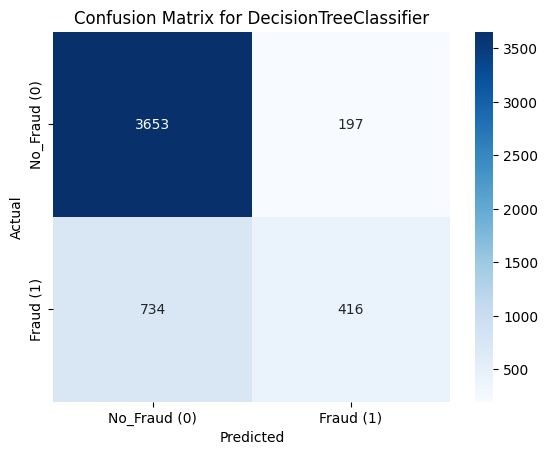

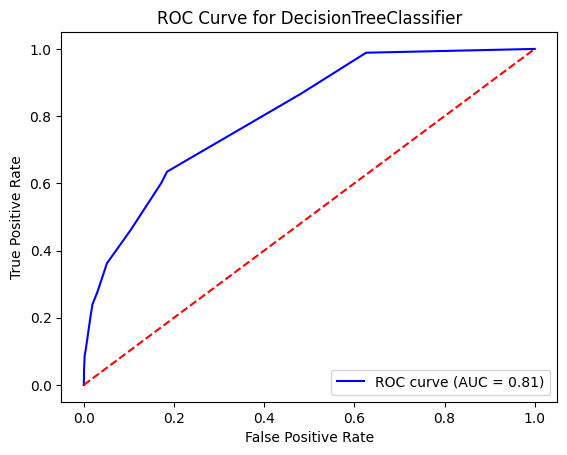

In [24]:
# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Define the model parameters as a string
params = {'max_depth': 4}

# Evaluate the model
evaluate_model(clf, X_test, y_test, params=params, model_name="DecisionTreeClassifier")

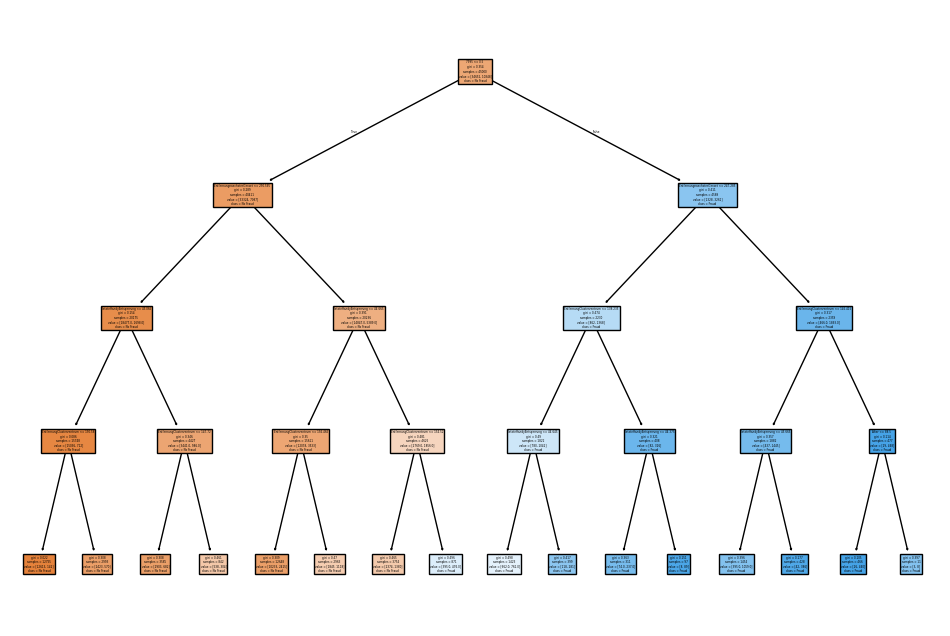

In [25]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the decision tree
plot_tree(clf, feature_names=X.columns, class_names=['No Fraud', 'Fraud'], filled=True, ax=ax)
#plt.savefig("imgs/default_decisiontreeclassifier")
plt.show()